# 📊 Dataset Information

**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download The Food Panda Dataset](https://www.kaggle.com/datasets/ayeshaimran1619/foodpanda-data-analysis/data)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.

# Importing

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

/kaggle/input/foodpanda-data-analysis/Foodpanda Analysis Dataset.csv


## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('Foodpanda Analysis Dataset.csv')

# Preprocessing

## Frist five row

In [3]:
df.head()

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
0,C5663,Male,Adult,Peshawar,1/14/2024,O9663,8/23/2023,McDonald's,Burger,Italian,5,1478.27,Cash,38,7/19/2025,238,Active,3,10/14/2024,Cancelled
1,C2831,Male,Adult,Multan,7/7/2024,O6831,8/23/2023,KFC,Burger,Italian,3,956.04,Wallet,24,11/25/2024,81,Active,2,8/21/2025,Delayed
2,C2851,Other,Senior,Multan,6/20/2025,O6851,8/23/2023,Pizza Hut,Fries,Italian,2,882.51,Cash,42,5/10/2025,82,Inactive,3,9/19/2024,Delayed
3,C1694,Female,Senior,Peshawar,9/5/2023,O5694,8/23/2023,Subway,Pizza,Dessert,4,231.30,Card,27,7/24/2025,45,Inactive,2,6/29/2025,Delayed
4,C4339,Other,Senior,Lahore,12/29/2023,O8339,8/24/2023,KFC,Sandwich,Dessert,1,1156.69,Cash,35,12/21/2024,418,Inactive,3,3/6/2025,Cancelled


## last Five row

In [4]:
df.tail()

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
5995,C6849,Male,Adult,Multan,11/25/2024,O10849,8/22/2025,Pizza Hut,Burger,Italian,4,875.71,Cash,28,11/29/2024,166,Active,5,12/30/2024,Cancelled
5996,C3787,Female,Adult,Islamabad,1/28/2025,O7787,8/22/2025,KFC,Pizza,Italian,5,1118.26,Cash,12,6/8/2025,193,Inactive,3,2/9/2025,Delayed
5997,C2841,Other,Teenager,Islamabad,10/19/2023,O6841,8/22/2025,KFC,Sandwich,Italian,4,1005.83,Card,31,12/30/2024,278,Active,4,3/23/2025,Cancelled
5998,C1624,Male,Adult,Islamabad,6/17/2024,O5624,8/22/2025,KFC,Fries,Fast Food,4,1226.10,Card,37,12/27/2024,55,Inactive,2,3/15/2025,Delivered
5999,C2068,Female,Adult,Multan,3/15/2025,O6068,8/22/2025,Burger King,Fries,Fast Food,3,1131.27,Card,2,6/13/2025,41,Inactive,1,7/15/2025,Delayed


## Shape of our dataset

In [5]:
df.shape

(6000, 20)

## List out all columns

In [6]:
df.columns

Index(['customer_id', 'gender', 'age', 'city', 'signup_date', 'order_id',
       'order_date', 'restaurant_name', 'dish_name', 'category', 'quantity',
       'price', 'payment_method', 'order_frequency', 'last_order_date',
       'loyalty_points', 'churned', 'rating', 'rating_date',
       'delivery_status'],
      dtype='object')

## Datatype of each columns

In [7]:
df.dtypes

customer_id         object
gender              object
age                 object
city                object
signup_date         object
order_id            object
order_date          object
restaurant_name     object
dish_name           object
category            object
quantity             int64
price              float64
payment_method      object
order_frequency      int64
last_order_date     object
loyalty_points       int64
churned             object
rating               int64
rating_date         object
delivery_status     object
dtype: object

## Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      6000 non-null   object 
 1   gender           6000 non-null   object 
 2   age              6000 non-null   object 
 3   city             6000 non-null   object 
 4   signup_date      6000 non-null   object 
 5   order_id         6000 non-null   object 
 6   order_date       6000 non-null   object 
 7   restaurant_name  6000 non-null   object 
 8   dish_name        6000 non-null   object 
 9   category         6000 non-null   object 
 10  quantity         6000 non-null   int64  
 11  price            6000 non-null   float64
 12  payment_method   6000 non-null   object 
 13  order_frequency  6000 non-null   int64  
 14  last_order_date  6000 non-null   object 
 15  loyalty_points   6000 non-null   int64  
 16  churned          6000 non-null   object 
 17  rating        

## Check Null Value

In [9]:
df.isnull().sum()

customer_id        0
gender             0
age                0
city               0
signup_date        0
order_id           0
order_date         0
restaurant_name    0
dish_name          0
category           0
quantity           0
price              0
payment_method     0
order_frequency    0
last_order_date    0
loyalty_points     0
churned            0
rating             0
rating_date        0
delivery_status    0
dtype: int64

## Check Dupicate Value

In [10]:
df.duplicated().sum()

np.int64(0)

## Summary

In [11]:
df.describe()

,quantity,price,order_frequency,loyalty_points,rating
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2.991667,800.524880,25.304667,250.173667,2.996833
std,1.414778,404.855029,14.358930,144.608478,1.406113
min,1.000000,100.300000,1.000000,0.000000,1.000000
25%,2.000000,441.997500,13.000000,125.000000,2.000000
50%,3.000000,806.460000,25.000000,249.500000,3.000000
75%,4.000000,1149.737500,37.000000,378.000000,4.000000
max,5.000000,1499.950000,50.000000,500.000000,5.000000


# EDA

In [12]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

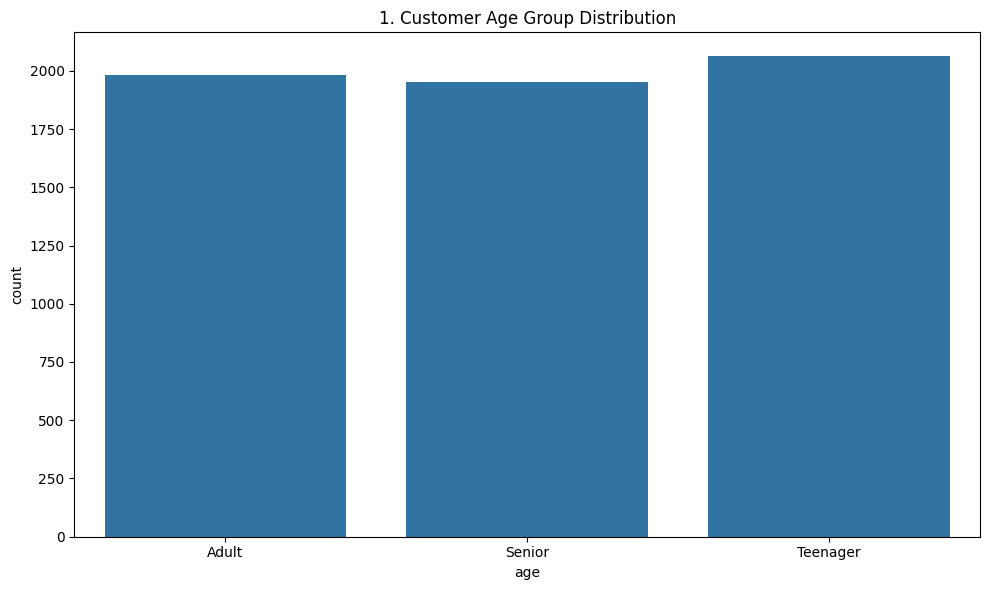

In [13]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='age')
plt.title(f'{plot_no}. Customer Age Group Distribution')
show_fig()
plot_no += 1


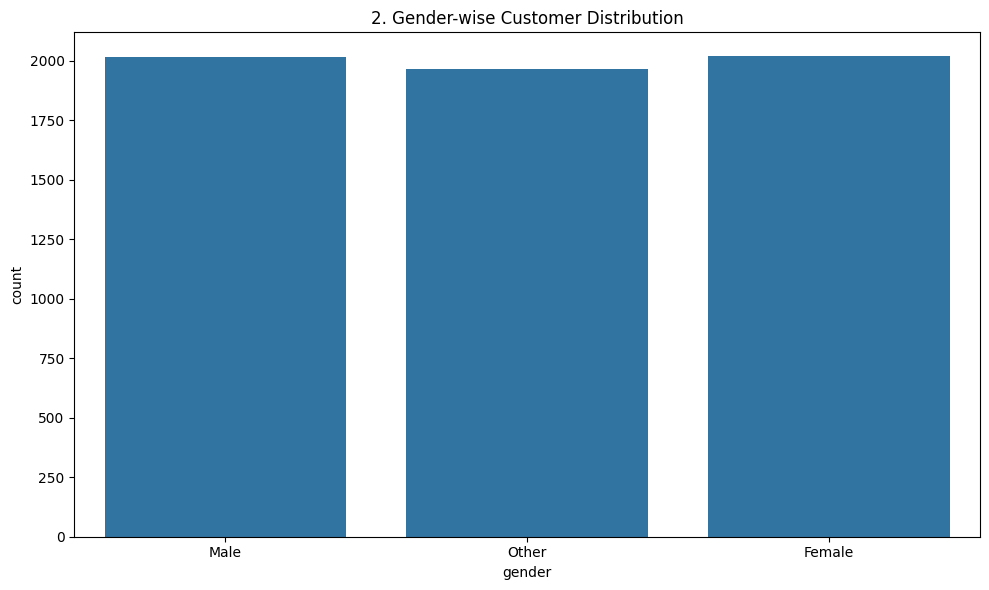

In [14]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='gender')
plt.title(f'{plot_no}. Gender-wise Customer Distribution')
show_fig()
plot_no += 1


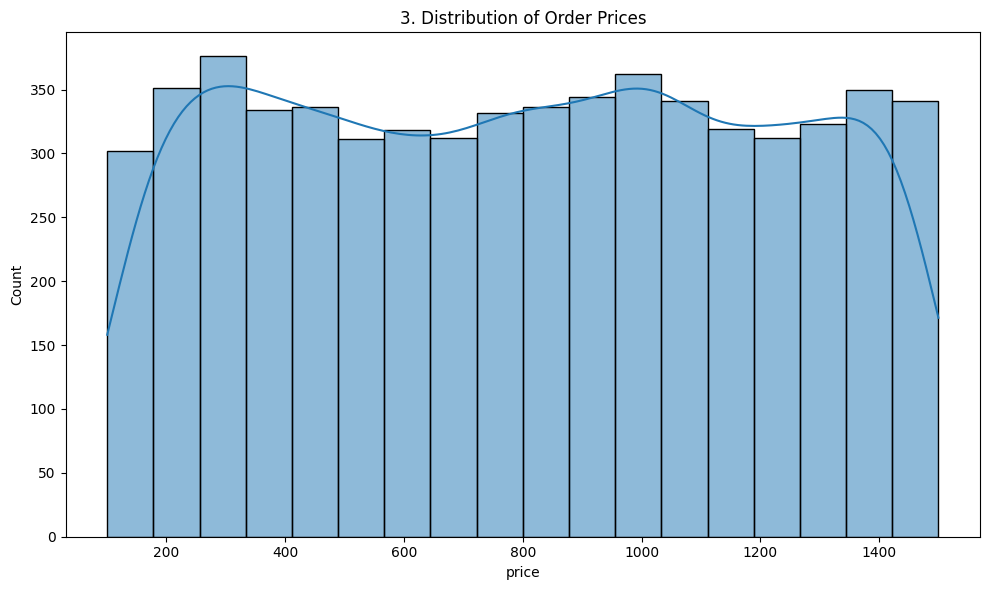

In [15]:
fig = plt.figure(figsize=(10,6))
sns.histplot(data=df, x='price', kde=True)
plt.title(f'{plot_no}. Distribution of Order Prices')
show_fig()
plot_no += 1


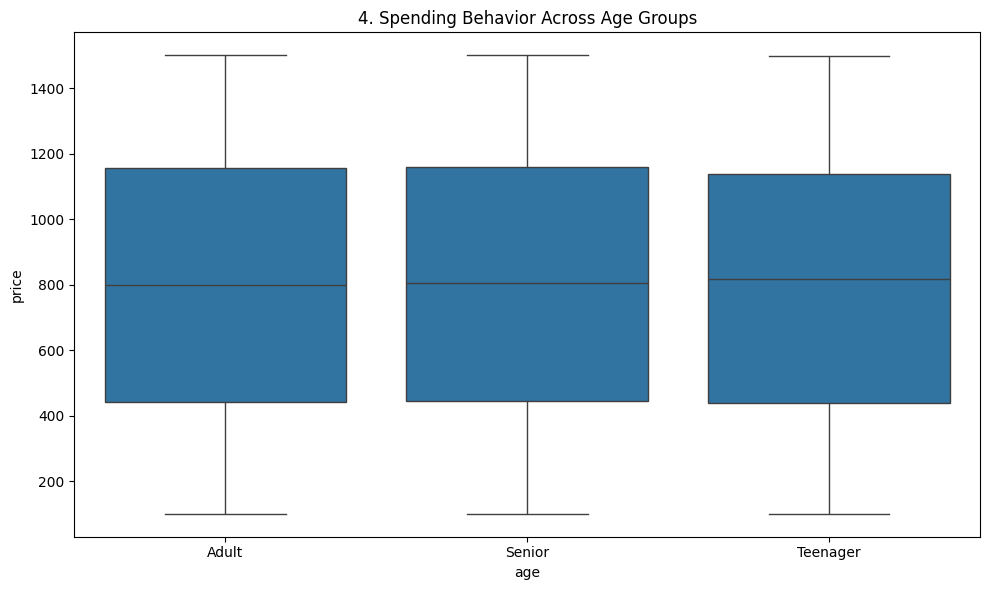

In [16]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='age', y='price')
plt.title(f'{plot_no}. Spending Behavior Across Age Groups')
show_fig()
plot_no += 1


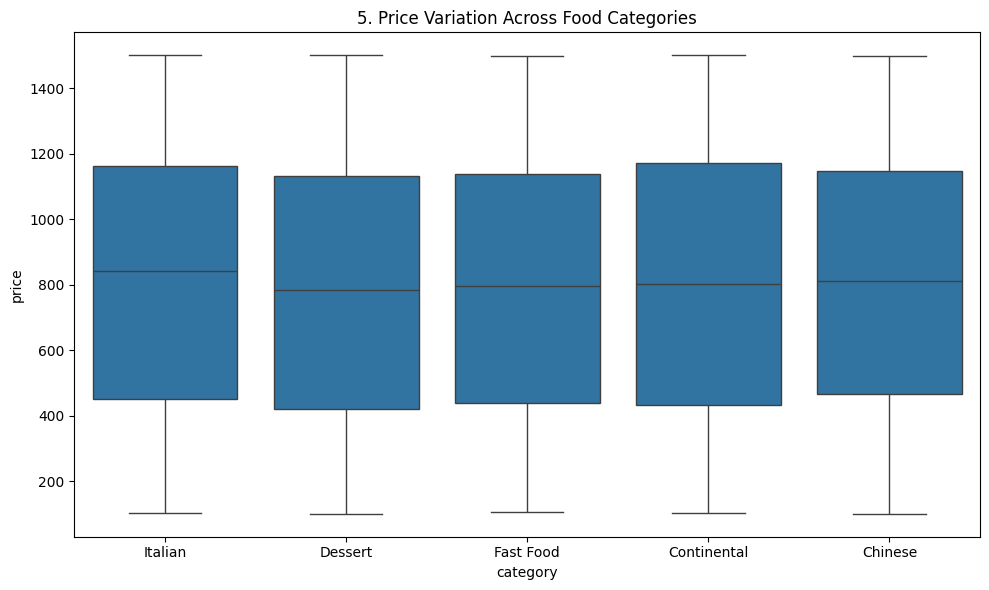

In [17]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='category', y='price')
plt.title(f'{plot_no}. Price Variation Across Food Categories')
show_fig()
plot_no += 1


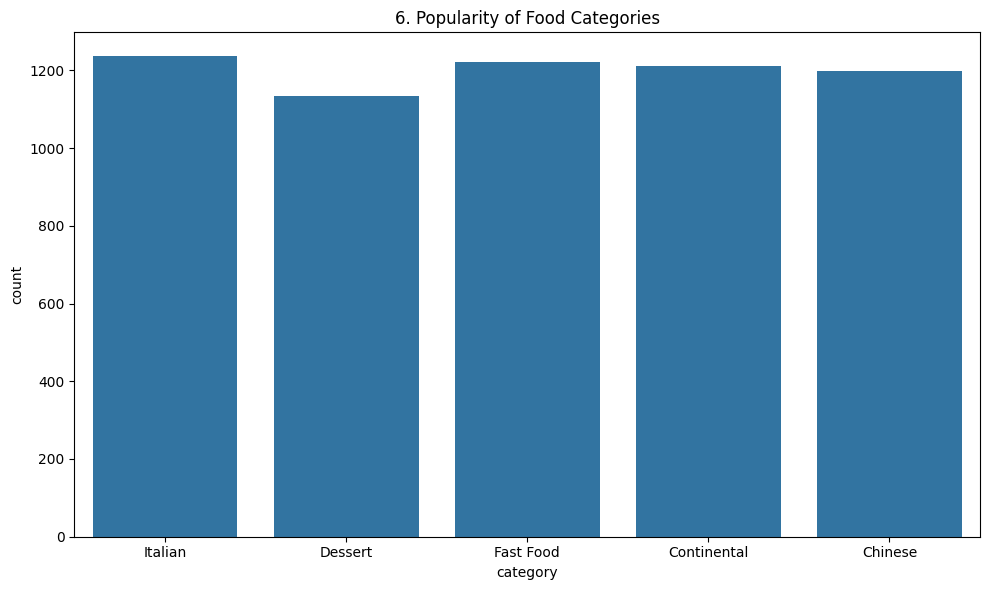

In [18]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='category')
plt.title(f'{plot_no}. Popularity of Food Categories')
show_fig()
plot_no += 1


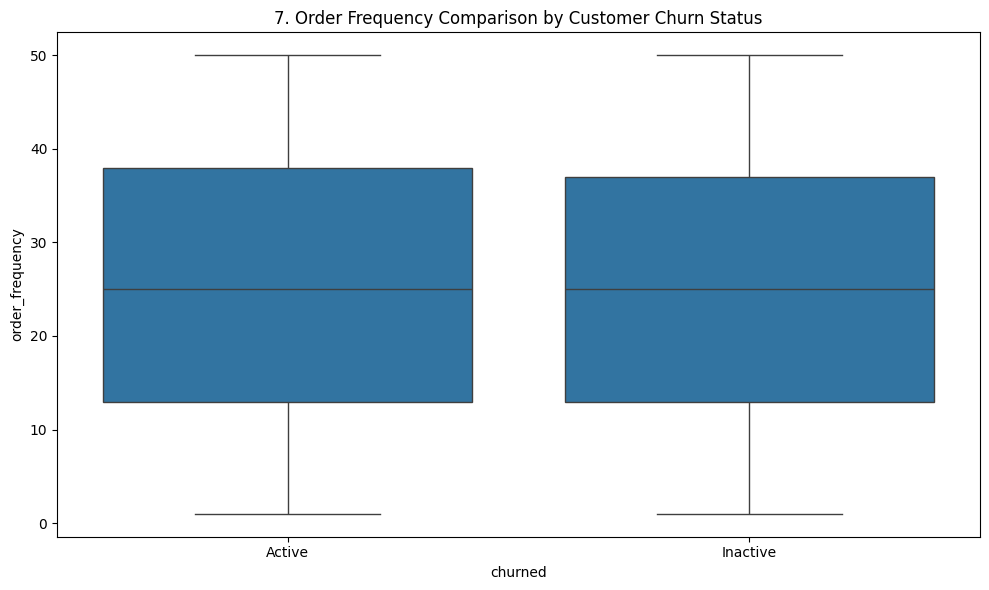

In [19]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='churned', y='order_frequency')
plt.title(f'{plot_no}. Order Frequency Comparison by Customer Churn Status')
show_fig()
plot_no += 1


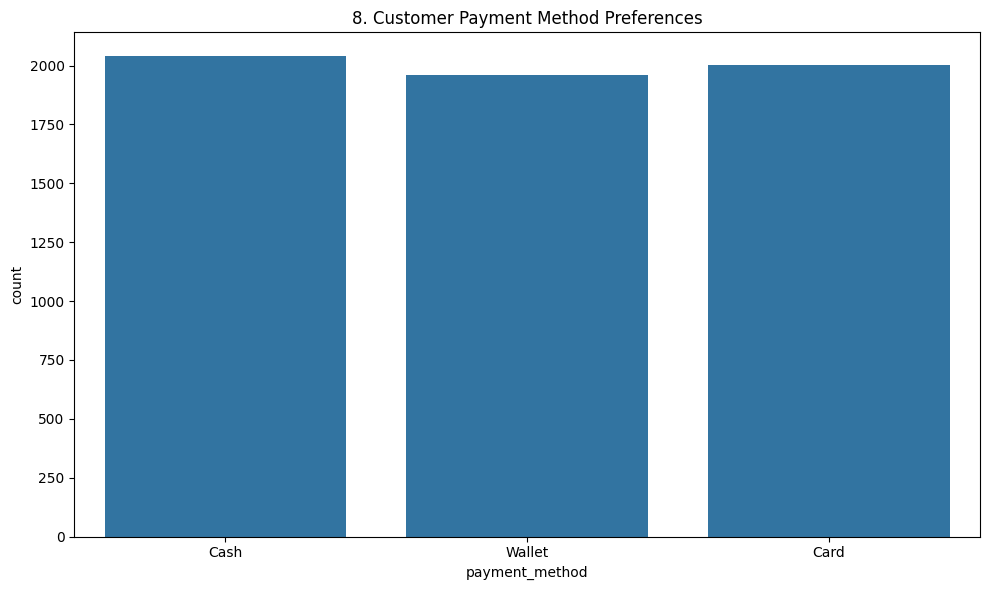

In [20]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='payment_method')
plt.title(f'{plot_no}. Customer Payment Method Preferences')
show_fig()
plot_no += 1


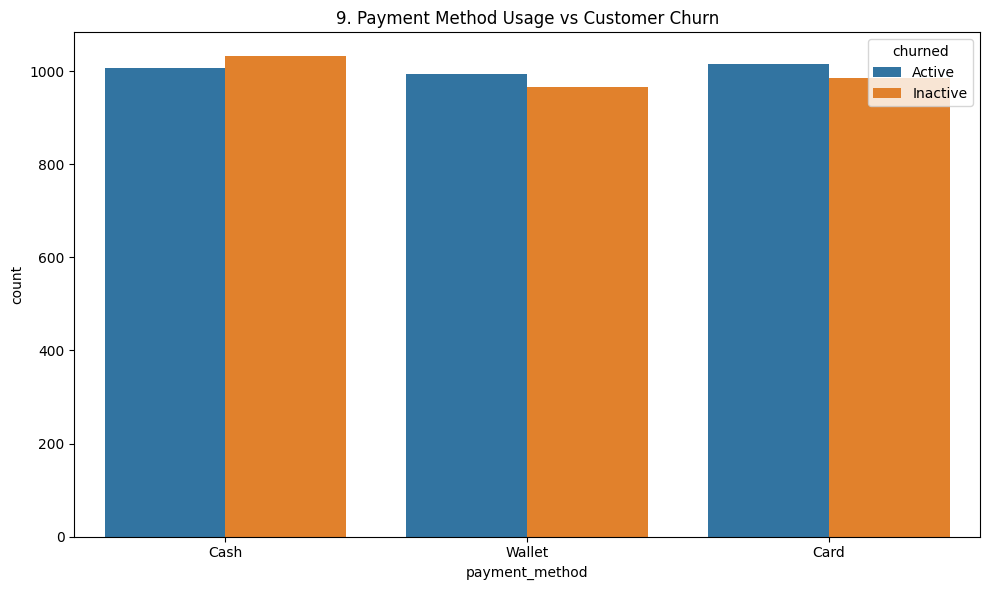

In [21]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='payment_method', hue='churned')
plt.title(f'{plot_no}. Payment Method Usage vs Customer Churn')
show_fig()
plot_no += 1


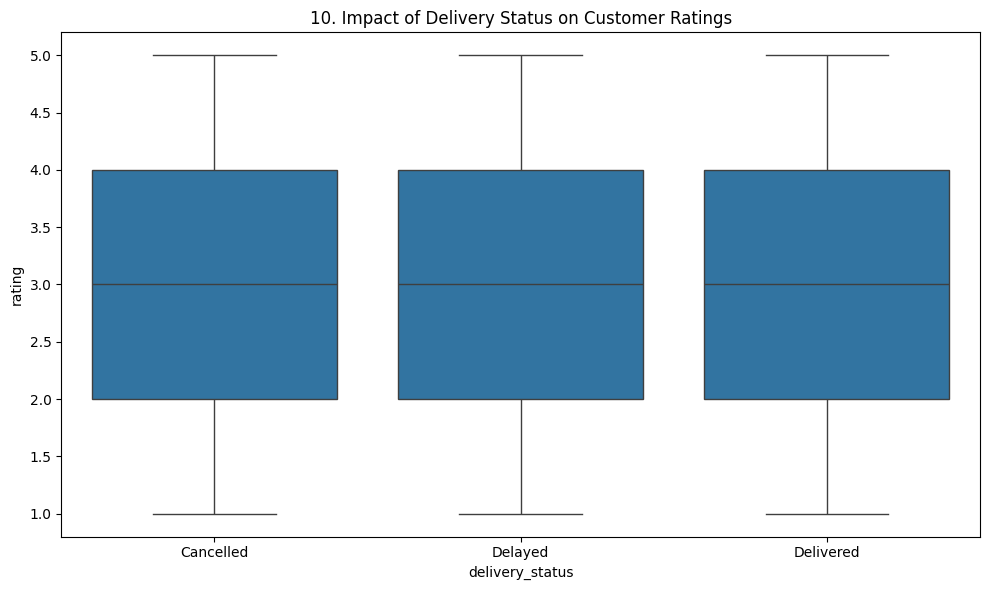

In [22]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='delivery_status', y='rating')
plt.title(f'{plot_no}. Impact of Delivery Status on Customer Ratings')
show_fig()
plot_no += 1


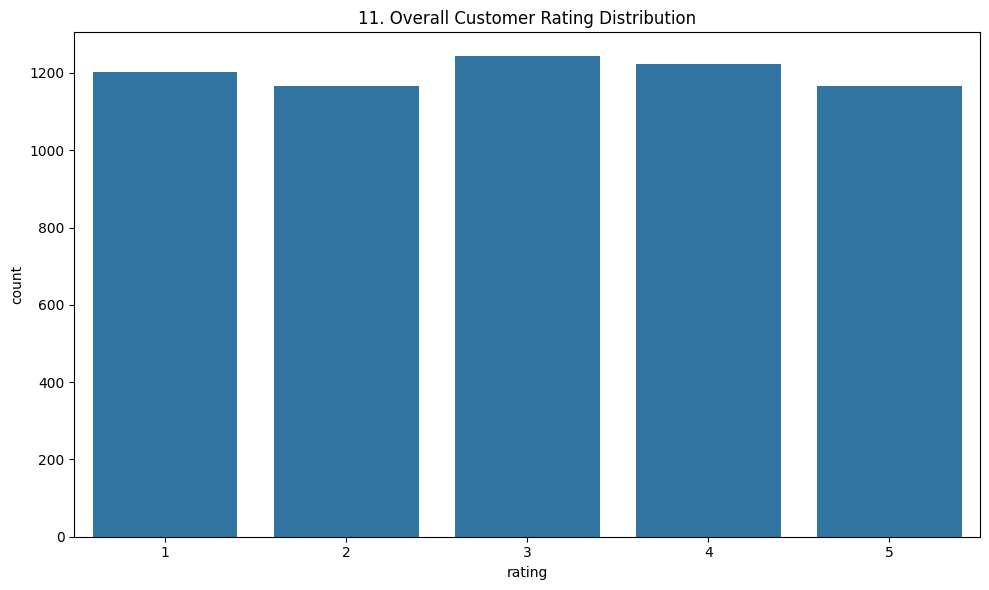

In [23]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='rating')
plt.title(f'{plot_no}. Overall Customer Rating Distribution')
show_fig()
plot_no += 1


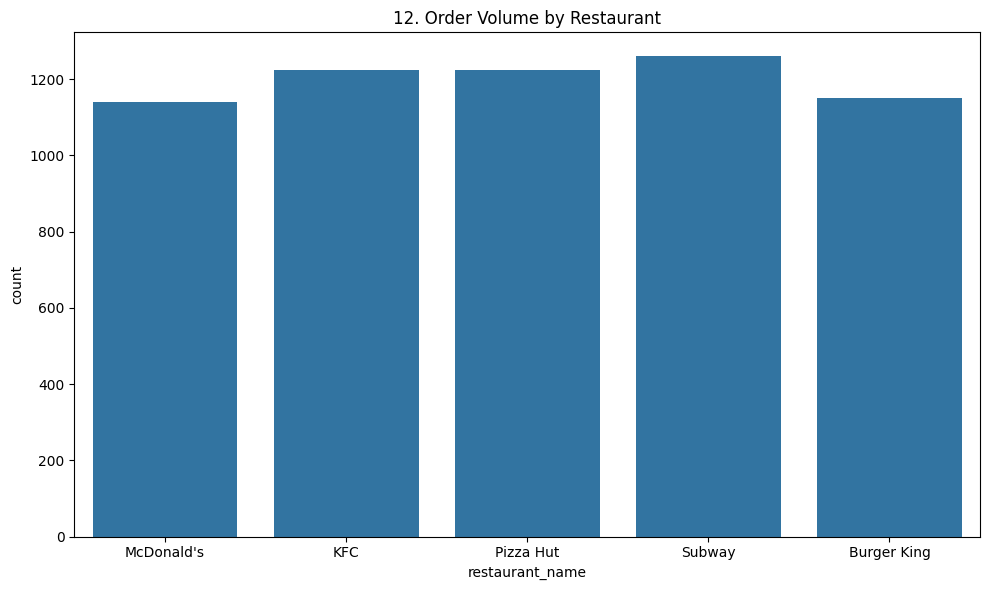

In [24]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='restaurant_name')
plt.title(f'{plot_no}. Order Volume by Restaurant')
show_fig()
plot_no += 1


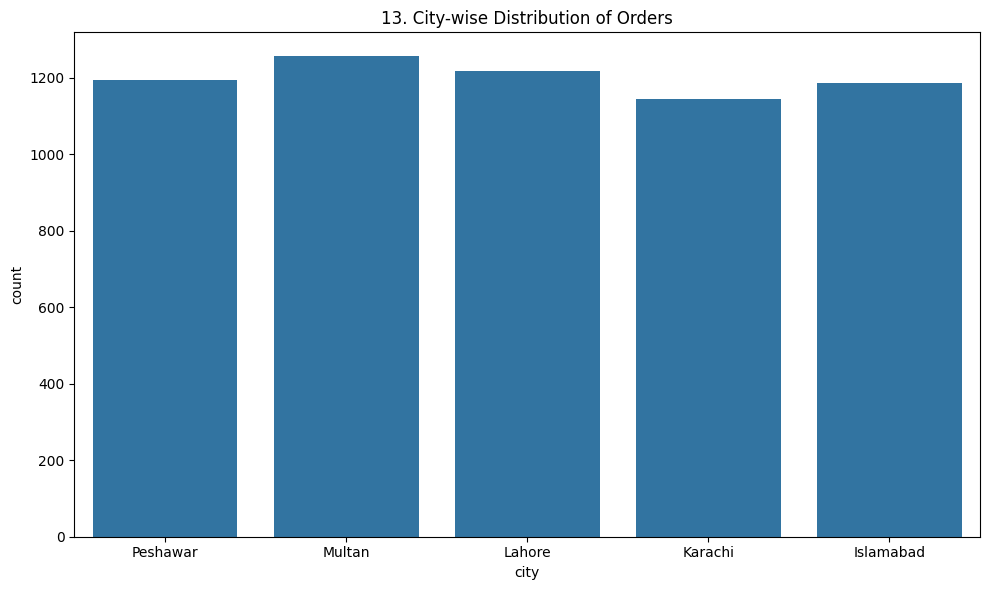

In [25]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='city')
plt.title(f'{plot_no}. City-wise Distribution of Orders')
show_fig()
plot_no += 1


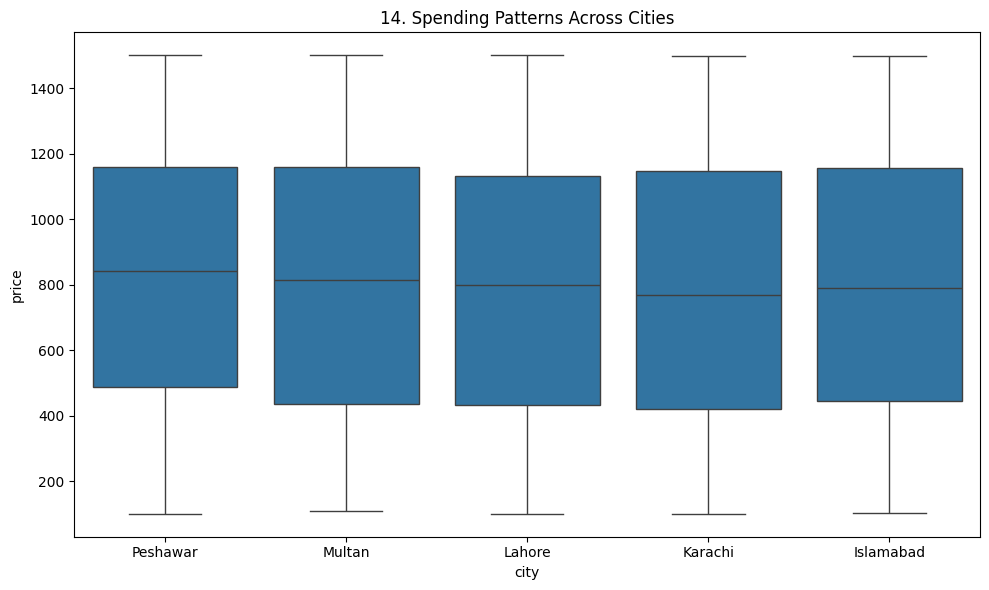

In [26]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='city', y='price')
plt.title(f'{plot_no}. Spending Patterns Across Cities')
show_fig()
plot_no += 1


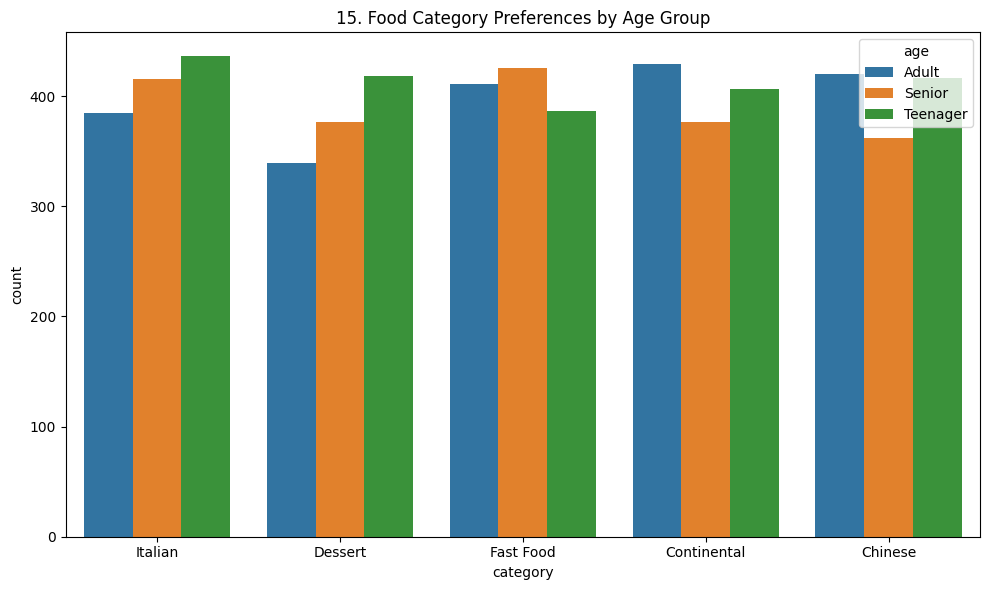

In [27]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='category', hue='age')
plt.title(f'{plot_no}. Food Category Preferences by Age Group')
show_fig()
plot_no += 1


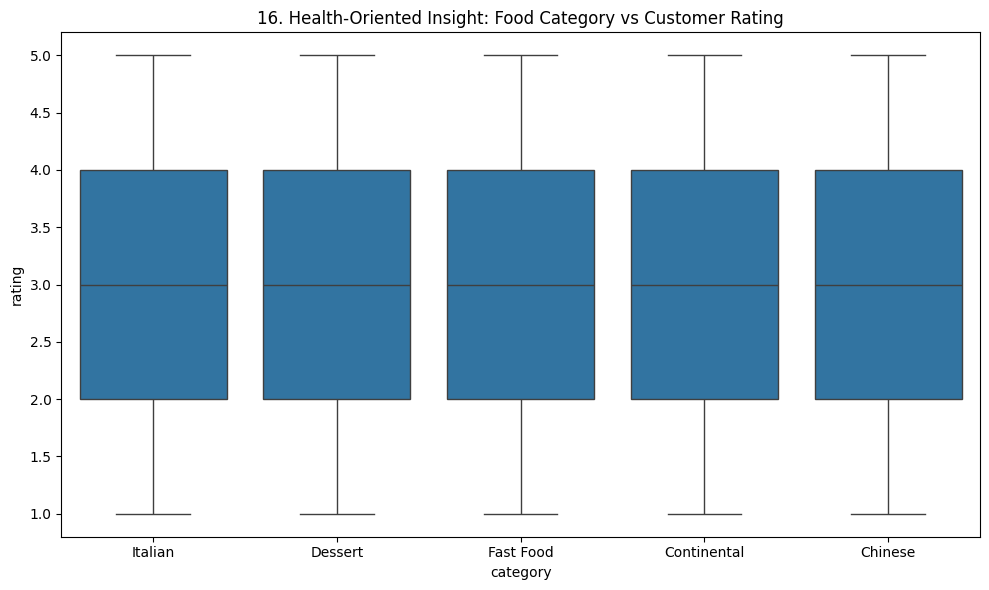

In [28]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='category', y='rating')
plt.title(f'{plot_no}. Health-Oriented Insight: Food Category vs Customer Rating')
show_fig()
plot_no += 1


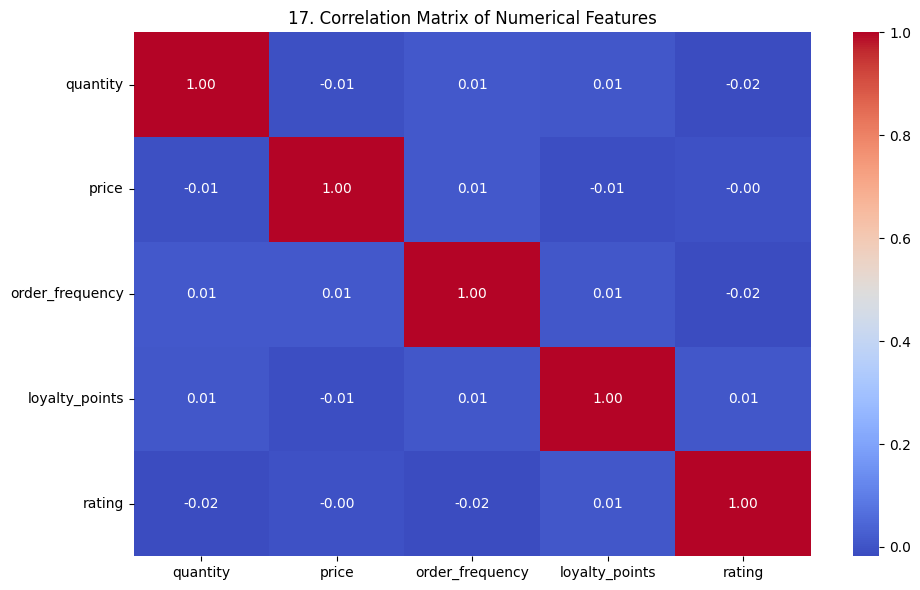

In [29]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title(f'{plot_no}. Correlation Matrix of Numerical Features')
show_fig()
plot_no += 1

# Model Training

## encode categorical columns

In [30]:
le = LabelEncoder()
df_encoded = df.copy()
for col in ['gender','age','city','payment_method','category','delivery_status']:
    df_encoded[col] = le.fit_transform(df_encoded[col])

## encode target variable

In [31]:
df_encoded['churned'] = df_encoded['churned'].map({'Active':0, 'Inactive':1})

## select stronger feature set

In [32]:
X = df_encoded[['quantity','price','order_frequency','loyalty_points','rating',
                'gender','age','city','payment_method','category','delivery_status']]
y = df_encoded['churned']

## split dataset

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## scale numerical features

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## train advanced supervised model

In [35]:
model = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=300,
                           random_state=42)

## make predictions

In [36]:
y_pred = model.predict(X_test)

## print accuracy

In [37]:
acc = accuracy_score(y_test, y_pred) * 100
print("Model Accuracy:", acc)

Model Accuracy: 51.74999999999999


## plot confusion matrix

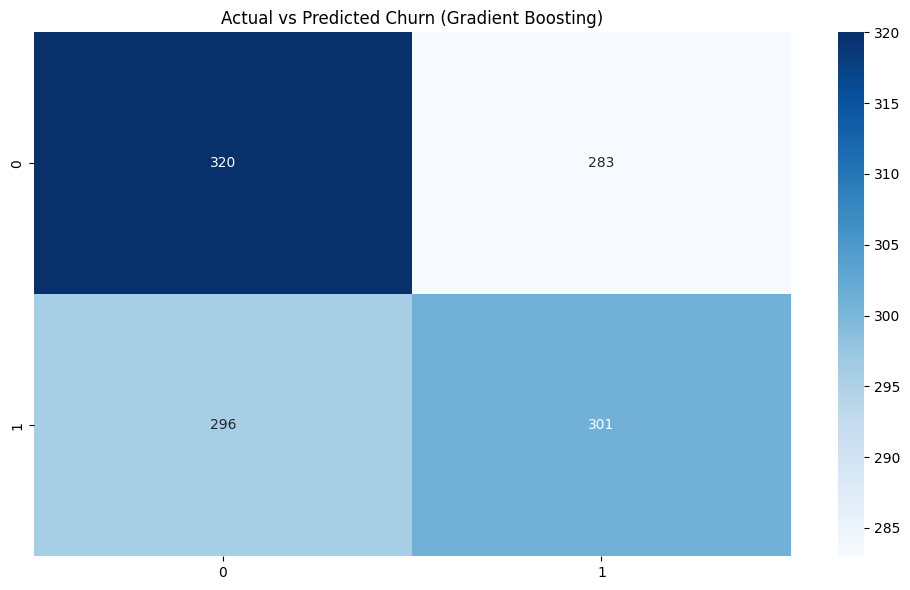

In [38]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Actual vs Predicted Churn (Gradient Boosting)')
show_fig()